<a href="https://colab.research.google.com/github/Ruqyai/chatBard/blob/main/Notebooks-Python/Demo_for_PaLM_API_in_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PaLM API for Chat



**By: Ruqiya Bin Safi**

## Vertex AI Console

[Try it](https://console.cloud.google.com/vertex-ai?_ga=2.127642958.2101037035.1685359046-1727221561.1639297185&_gac=1.254495354.1685454096.CjwKCAjwvdajBhBEEiwAeMh1U3MRtYL1V0H2XBf_I-GW-vwCmSfm0BaZYc4LJFL-js6jIbKZjiBUWxoCFGgQAvD_BwE)

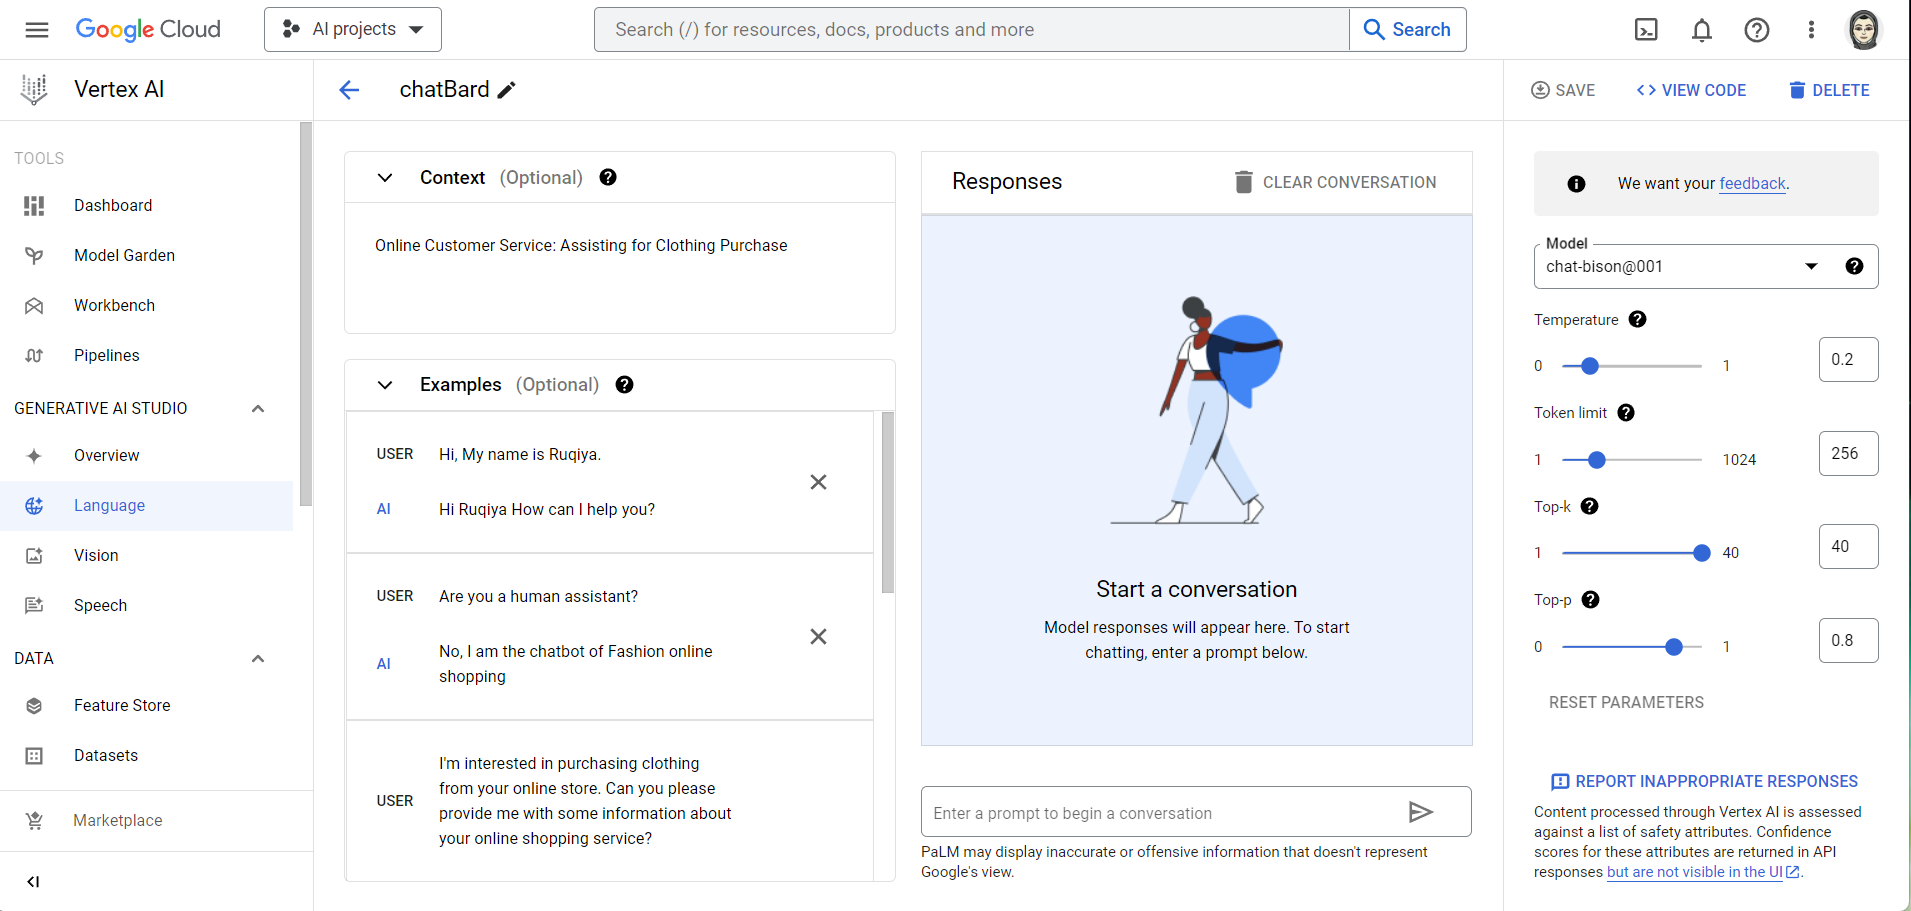

## Python script

If you want to use a script to request a model response in your application.
Set up the [Vertex AI SDK for Python](https://cloud.google.com/python/docs/reference/aiplatform/latest/index.html) then do the same steps for Colab except the authentication

## Python Colab

In [1]:
# Note: Restaret your Colab notebook runtime. after install it
!pip install google-cloud-aiplatform  # &> /dev/null

In [2]:
#Authenticating your Colab notebook
from google.colab import auth as google_auth
google_auth.authenticate_user()

In [3]:

import vertexai
from vertexai.preview.language_models import ChatModel, InputOutputTextPair

def predict_large_language_model_sample(
    project_id: str,
    model_name: str,
    temperature: float,
    max_output_tokens: int,
    top_p: float,
    top_k: int,
    message: str,
    location: str = "us-central1",
    ) :
    """Predict using a Large Language Model."""
    vertexai.init(project=project_id, location=location)

    chat_model = ChatModel.from_pretrained(model_name)
    parameters = {
      "temperature": temperature,
      "max_output_tokens": max_output_tokens,
      "top_p": top_p,
      "top_k": top_k,
    }

    chat = chat_model.start_chat(
      context='''Online Customer Service: Assisting for Clothing Purchase''',
      examples=[
        InputOutputTextPair(
          input_text='''Hi, My name is Ruqiya.''',
          output_text='''Hi Ruqiya How can I help you?'''
        ),
        InputOutputTextPair(
          input_text='''Are you a human assistant?''',
          output_text='''No, I am the chatbot of Fashion online shopping'''
        ),
        InputOutputTextPair(
          input_text='''I'm interested in purchasing clothing from your online store. Can you please provide me with some information about your online shopping service?''',
          output_text='''Certainly! We offer a convenient and secure online shopping experience for our customers. Our website is designed to make browsing and purchasing clothing items easy and enjoyable. You can explore our wide range of clothing options, including shirts, jeans, dresses, and more.'''
        ),
        InputOutputTextPair(
          input_text='''That sounds great. How can I find the specific clothing items I'm looking for?''',
          output_text='''On our website, you can use the search bar to look for specific items by name, style, or category. We also have filters that allow you to narrow down your search based on size, color, and price range. Additionally, we have detailed product descriptions, images, and customer reviews to help you make informed decisions.'''
        )
      ]
    )
    response = chat.send_message(message, **parameters)
    
    return response 




In [4]:
project_id="ai-projects2023"# add your project_id
model_name="chat-bison@001"
temperature= 0.2
max_output_tokens=256
top_p= 0.8
top_k=40
location = "us-central1"

In [5]:
message="Hello"

In [6]:
# Test it
predict_large_language_model_sample(project_id, model_name, temperature, max_output_tokens, top_p, top_k ,message ,location)

Hello! How can I help you today?

# How to Build a Demo Chatbot Using Gradio 

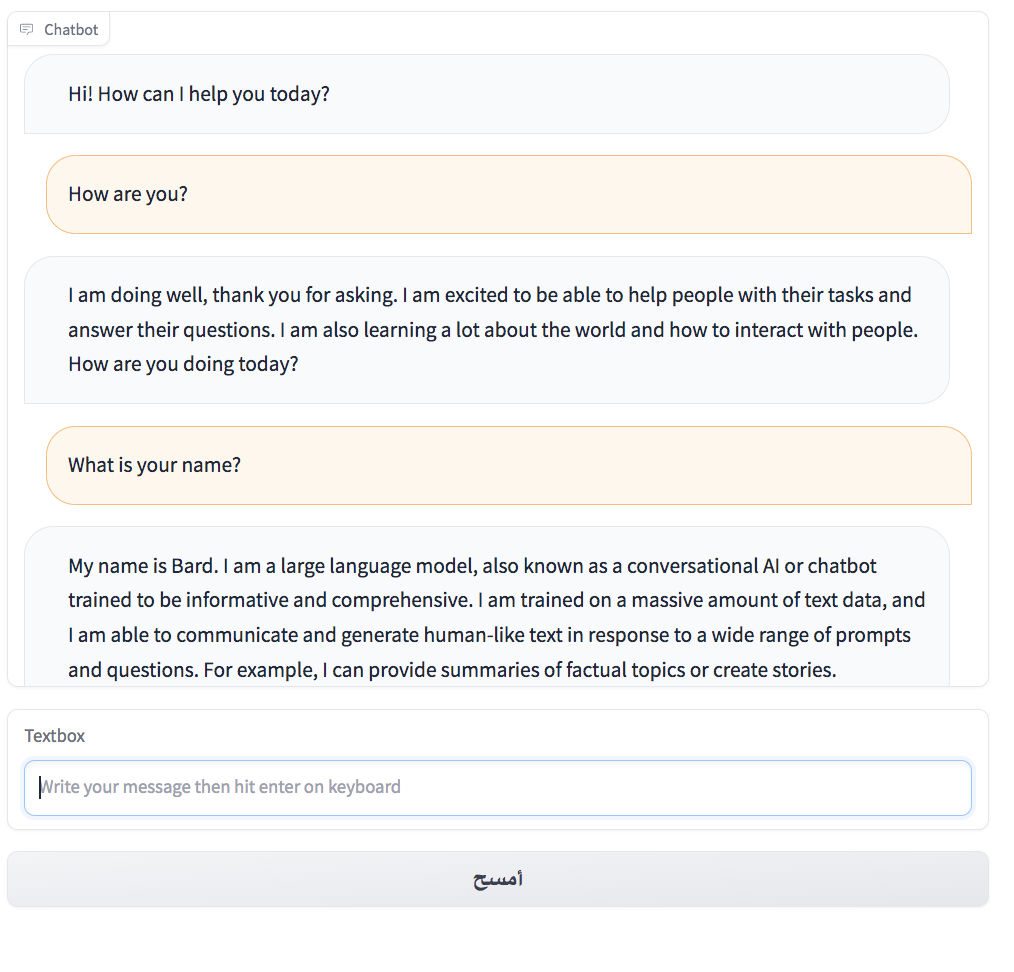

In [7]:
# Create a funtion that take just the message (prompt)
def chatbot_create(prompt):
    response = predict_large_language_model_sample(project_id, model_name, temperature, max_output_tokens, top_p, top_k ,prompt ,location)
    return response

In [8]:
! pip install gradio &> /dev/null

In [9]:
import gradio as gr
import time

with gr.Blocks() as demo:
    chatbot = gr.Chatbot()
    msg = gr.Textbox(placeholder="Write your message then hit enter on keyboard")
    clear = gr.Button("Clear")

    def respond(message, chat_history):
        bot_message = chatbot_create(message)
        chat_history.append((message, str(bot_message)))
        time.sleep(1)
        return "", chat_history

    msg.submit(respond, [msg, chatbot], [msg, chatbot])
    clear.click(lambda: None, None, chatbot, queue=False)

if __name__ == "__main__":
    demo.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://257f3eb375b0a06ccb.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


## Learn more:

- [Docs](https://cloud.google.com/vertex-ai/docs/generative-ai/learn/overview)
- [Generative AI repository](https://github.com/GoogleCloudPlatform/generative-ai)
- [Python-docs-samples/generative_ai](https://github.com/GoogleCloudPlatform/python-docs-samples/tree/main/generative_ai)
- [Google AI: PaLM2](https://ai.google/discover/palm2)
- [Build generative AI applications](https://developers.generativeai.google/)
- [Awesome Prompt Engineering](https://github.com/promptslab/Awesome-Prompt-Engineering)